# 高级类型

## 交叉类型



In [1]:
interface Programmer {
    eat: () => void
    sleep: () => void
    code: () => void
}

interface Manager {
    eat: () => void
    sleep: () => void
    makeplan: () => void
}

let boss: Manager & Programmer = {
    eat: () => {
        console.log('eating')
    },
    sleep: () => {
        console.log('sleeping')
    },
    code: () => {
        console.log('coding')
    },
    makeplan: () => {
        console.log('planning')
    },
}

undefined

交叉类型的对象可以使用所有类型的所有属性(boss 既是 Programmer 又是 Manager，两个类型的属性他都有)：

In [2]:
boss.eat()
boss.sleep()
boss.code()
boss.makeplan()

eating
sleeping
coding
planning


undefined

## 联合类型

交叉类型将多个类型合并为一个类型。

In [3]:
let someone: Programmer | Manager = {
    eat: () => {
        console.log('eating')
    },
    sleep: () => {
        console.log('sleeping')
    },
    code: () => {
        console.log('coding')
    },
    makeplan: () => {
        console.log('planning')
    },
}

undefined

交叉类型的对象只能访问所有类型共有的属性(someone 是 Programmer 或者 Manager，他可能会 code，也可能不会)：

In [4]:
// ok
someone.eat()
someone.sleep()

eating
sleeping


undefined

In [5]:
// not ok
someone.code()

Error: Line 2, Character 9
someone.code()
________^
TS2339: Property 'code' does not exist on type 'Programmer | Manager'.
  Property 'code' does not exist on type 'Manager'.

## 类型保护与区分类型

如果我们需要调用 `someone.code`，该怎么办呢？

一个办法是类型断言：

In [6]:
;(<Programmer>someone).sleep();

(<Manager>someone).makeplan()

sleeping
planning


undefined

为了避免多次使用类型断言，可以使用类型保护：

- 类型谓词
- typeof
- instanceof

#### 类型谓词

类型谓词作为一个函数的返回值：

这里，在 if 内我们知道 someone 是 Programmer，而且知道在 else 内 someone 是 Manager。

In [7]:
function isProgrammer(person: Programmer | Manager): person is Programmer {
    return (<Programmer>person).code !== undefined
}

if (isProgrammer(someone)) {
    someone.code()
} else {
    someone.makeplan()
}

coding


undefined

#### typeof 类型保护

对于原始类型，我们不需要每次定义函数来判断对象类型，这太麻烦了。我们可以与 typeof 来进行类型保护：

typeof 类型保护只有两种形式：

- typeof v === "typename"
- typeof v !== "typename"

其中 typename 只能是 "number"， "string"， "boolean"或 "symbol"。

In [8]:
function mulTwo(x: string | number): string | number {
    if (typeof x === 'number') {
        return x * 2
    } else {
        return x.repeat(2)
    }
}

console.log(mulTwo(5))
console.log(mulTwo('5'))

10
55


undefined

#### instanceof 类型保护

instanceof的右侧要求是一个构造函数。

In [9]:
class Dog {
    eat() {}
    bark() { console.log('wang~') }
}

class Cat {
    eat() {}
    mew() { console.log('meeew~') }
}

function getPet(x: number) {
    return x > 1 ? new Dog() : new Cat()
}

// pet 的类型为 Dog | Cat
let pet = getPet(5)
if (pet instanceof Dog) {
    pet.bark()
} else {
    pet.mew()
}

wang~


undefined

## null 与 undefined

null 与 undefined 可以赋值给任意类型。

如果需要区分 null，打开 TypeScript 的 `--strictNullChecks`。

```js
// ok
let s: string
s = null

// not ok with --strictNullChecks
let n: number
n = undefined
```

null 与 undefined 可以与其他类型组成联合类型，这时候就可能需要使用类型保护去除 null。

In [10]:
function echo(s: string | null) {
    if (s !== null) {
        console.log(s)
    } else {
        console.log("it's null")
    }
}

// 或者

function echo2(s: string | null) {
    console.log(s || "it's null")
}

echo(null)
echo2(null)

it's null
it's null


undefined

编译器有可能不能去除 null，这时候需要我们手动去除。**方法是在变量名后边加`!`，这样就去除了 null 与 undefined.**

In [11]:
function getLength(s: string | null) {
    function getIt() {
        // 编译器不能自动去除 null，我们手动加 ! 来去除
        return s!.length
    }
    s = s || ""
    return getIt()
}

console.log(getLength('hello'))
console.log(getLength(null))

5
0


undefined

## 类型别名

类型别名给类型起一个新的名字，指向原来的类型（它本身不创建新的类型）。

In [12]:
type Boss = Programmer & Manager

let alice: Boss = {
    eat: () => {
        console.log('eating')
    },
    sleep: () => {
        console.log('sleeping')
    },
    code: () => {
        console.log('coding')
    },
    makeplan: () => {
        console.log('planning')
    }
}

alice.eat()
alice.sleep()
alice.code()
alice.makeplan()

eating
sleeping
coding
planning


undefined

#### 类型别名可能是泛型

In [13]:
type Container<T> = { value: T }

type LinkedList<T> = {
    value: T,
    next: LinkedList<T> | null
}

let ll: LinkedList<number> =  {
    value: 1,
    next: {
        value: 2,
        next: null,
    }
}

console.log(ll.value)
console.log(ll.next!.value)

1
2


undefined

*类型别名不能出现在 `=` 的右侧*

In [14]:
type Yikes = Array<Yikes>; // error

Error: Line 1, Character 6
type Yikes = Array<Yikes>; // error
_____^
TS2456: Type alias 'Yikes' circularly references itself.

## 字符串字面类型

In [15]:
type Size = "small" | "middle" | "big"

function getButton(size: Size): string {
    if (size === 'small') {
        return 'small button'
    } else if (size === 'middle') {
        return 'middle button'
    } else {
        return 'big button'
    }
}

// 只能是 Size 规定的几种值
getButton('small')

'small button'

In [16]:
getButton('huge')

Error: Line 1, Character 11
getButton('huge')
__________^
TS2345: Argument of type '"huge"' is not assignable to parameter of type 'Size'.

## 数字字面量类型

与字符串字面量类型类似。

In [17]:
type DiceValue = 1 | 2 | 3 | 4 | 5 | 6

function roll(): DiceValue {
    return <DiceValue>Math.ceil(Math.random() * 6)
}

console.log(roll())

5


undefined

## 枚举成员类型

每个成员都用字面量初始化的枚举类型成员是有类型的。详见枚举一章。

*枚举成员类型与字符串/数字字面量类型*

我们可以定义一个类型为枚举成员类型：

```ts
enum Color {
    Red,
    Green,
    Blue,
}
```

或者字符串字面类型：

```ts
type Color = 'Red' | 'Green' | 'Blue'
```

两者不同之处在于：

- 枚举成员类型在运行时是真实存在的对象（除非声明 const 枚举），字符串字面类型不是
- 枚举成员类型适用于我们不关心它的值的情境下：类型旳值是不透明的。
- 两者在编辑器智能提示时不同

#### 枚举类型

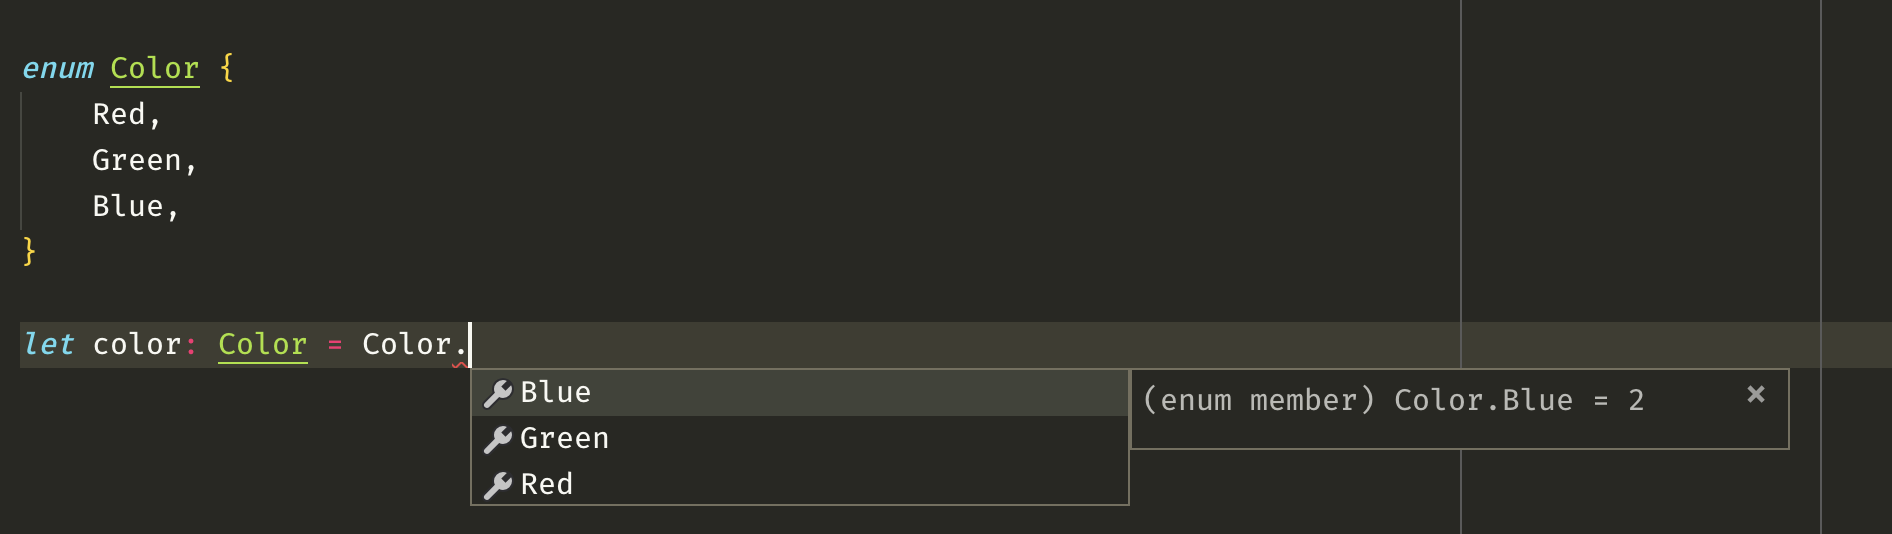

#### 字符串字面量类型

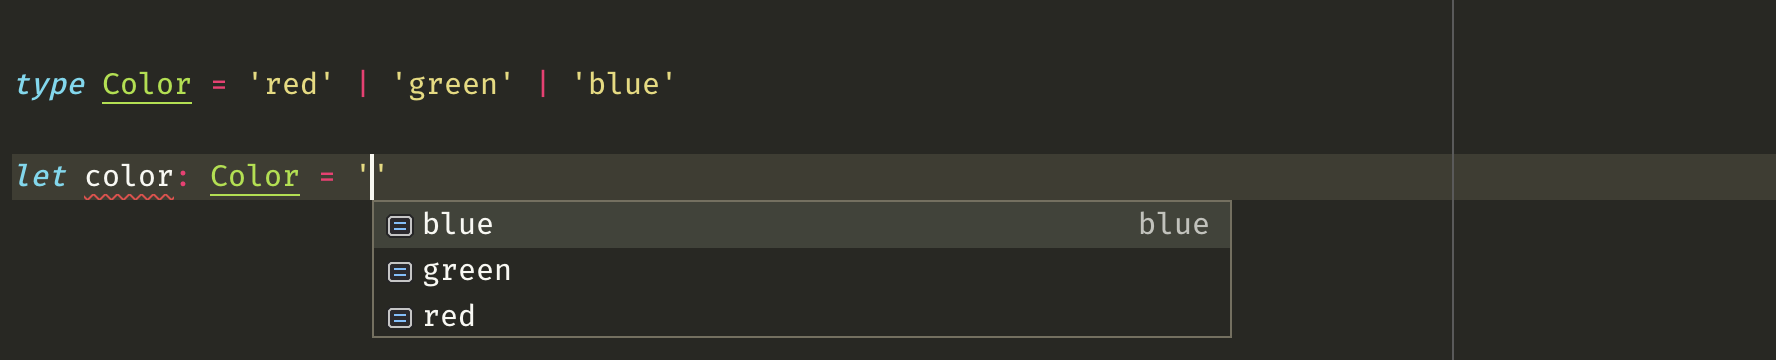


## 映射类型

映射类型用于从旧类型创建新类型。

In [18]:
type Reaconly<T> = {
    [K in keyof T]: T[K]
}

type Optional<T> = {
    [K in keyof T]?: T[K]
}

interface Person {
    name: string
    age: number
}

type ReadonlyPerson = Readonly<Person>

let bob: ReadonlyPerson = {
    name: 'Bob',
    age: 10
}

undefined

In [19]:
// it's readonly
bob.age = 20

Error: Line 2, Character 5
bob.age = 20
____^
TS2540: Cannot assign to 'age' because it is a read-only property.

In [20]:
type OptionalPerson = Optional<Person>

let Tom: OptionalPerson =  {
    name: 'Tom'
}

undefined